In [9]:
#this code introduces you to machine learning training and inference (predictions) in Python on AWS

#start a line with '!' to write to the command line instead. 
#This allows you to install packages to the EC2 instance from within jupyter
!pip install pandas
!pip install seaborn
!pip install sklearn
!pip install numpy

#import the packages that you installed
import pandas as pd
import seaborn.apionly as sns
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
import time
import matplotlib.pyplot as plt
%matplotlib inline

#load a default seaborn dataset, display simple stats about data size, and then print the data's head
df = pd.DataFrame(sns.load_dataset('iris'))
print 'shape of the data frame'+str(df.shape)
print df.groupby(['species']).size()
df.head(50)

Exception:
Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/pip/basecommand.py", line 215, in main
    status = self.run(options, args)
  File "/usr/local/lib/python2.7/dist-packages/pip/commands/install.py", line 342, in run
    prefix=options.prefix_path,
  File "/usr/local/lib/python2.7/dist-packages/pip/req/req_set.py", line 784, in install
    **kwargs
  File "/usr/local/lib/python2.7/dist-packages/pip/req/req_install.py", line 851, in install
    self.move_wheel_files(self.source_dir, root=root, prefix=prefix)
  File "/usr/local/lib/python2.7/dist-packages/pip/req/req_install.py", line 1064, in move_wheel_files
    isolated=self.isolated,
  File "/usr/local/lib/python2.7/dist-packages/pip/wheel.py", line 345, in move_wheel_files
    clobber(source, lib_dir, True)
  File "/usr/local/lib/python2.7/dist-packages/pip/wheel.py", line 316, in clobber
    ensure_dir(destdir)
  File "/usr/local/lib/python2.7/dist-packages/pip/utils/__init__.py", line 83, 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


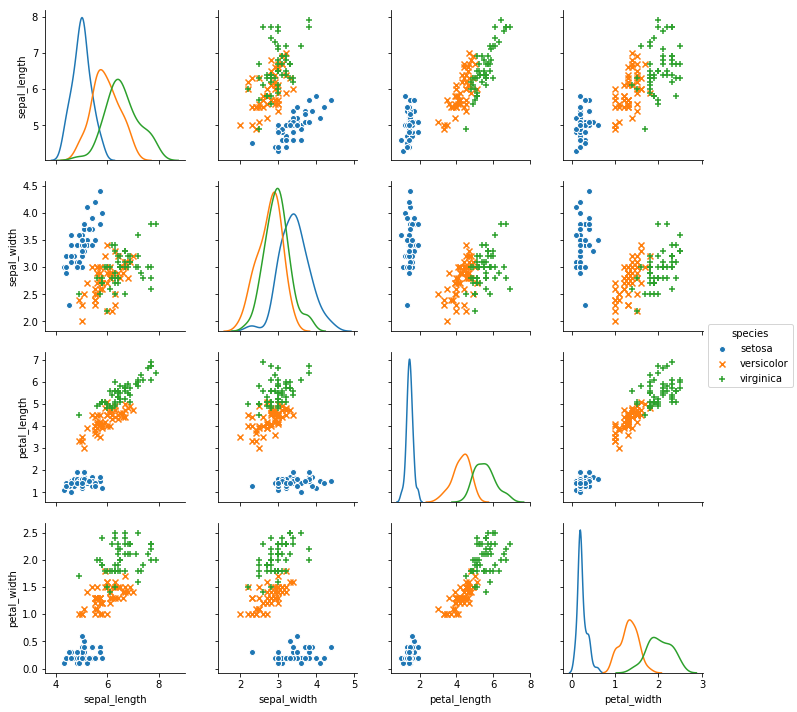

In [4]:
#showoff some of what seaborn can do
sns.pairplot(df, hue="species", diag_kind="kde",markers=['o','x','+'])

In [5]:
#let's group setosa and verginica together for the sake of this machine learning exercise
df['y']= np.where(df['species']=='versicolor', 1,0)
print df.groupby(['y']).size()

y
0    100
1     50
dtype: int64


In [6]:
#split into train and test
X=df.drop('species',1).drop('y',1)
y=df['y']
RANDOM_STATE=0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)
print ('the number in training set: '+str(len(X_train)))
print ('the number in test set: '+str(len(X_test)))


the number in training set: 112
the number in test set: 38


In [27]:
#Randomized search for model selection
clf = tree.DecisionTreeClassifier()
# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean OOB score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
#change parameters to these three below, also changed the number from 2-10 and 1-10 on split and leaf
param_dist = {"max_features": sp_randint(1, 5),
              "max_depth": [3, None],
              "min_samples_split": sp_randint(2, 10),
              "min_samples_leaf": sp_randint(1, 10),}

# run randomized search
n_iter_search = 25
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

random_search.fit(X_train, y_train)
#this might take a minute to run
print("RandomizedSearchCV examined %d candidate parameter settings." % (n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV examined 25 candidate parameter settings.
Model with rank: 1
Mean OOB score: 0.973 (std: 0.022)
Parameters: {'max_features': 4, 'min_samples_split': 7, 'max_depth': None, 'min_samples_leaf': 8}

Model with rank: 2
Mean OOB score: 0.964 (std: 0.025)
Parameters: {'max_features': 3, 'min_samples_split': 7, 'max_depth': None, 'min_samples_leaf': 4}

Model with rank: 2
Mean OOB score: 0.964 (std: 0.025)
Parameters: {'max_features': 3, 'min_samples_split': 4, 'max_depth': None, 'min_samples_leaf': 6}

Model with rank: 2
Mean OOB score: 0.964 (std: 0.013)
Parameters: {'max_features': 4, 'min_samples_split': 8, 'max_depth': None, 'min_samples_leaf': 8}

Model with rank: 2
Mean OOB score: 0.964 (std: 0.025)
Parameters: {'max_features': 3, 'min_samples_split': 2, 'max_depth': 3, 'min_samples_leaf': 6}

Model with rank: 2
Mean OOB score: 0.964 (std: 0.025)
Parameters: {'max_features': 4, 'min_samples_split': 4, 'max_depth': None, 'min_samples_leaf': 3}

Model with rank: 2
Mean 

In [28]:
#2.5 Train the random forest according to the best paramater setting given above. Show model outputs.

#YOUR HOMEWORK IS TO SWITCH RANDOM FOREST CLASSIFIED WITH ANOTHER CLASSIFIER FROM THE SCIKIT LEARN API
#http://scikit-learn.org/stable/
#hard code results
clf = tree.DecisionTreeClassifier(max_features=4,min_samples_split=7,min_samples_leaf=8,max_depth=None)

clf = clf.fit(X_train, y_train)

importances = clf.feature_importances_
names = X.columns
items=sorted(zip(map(lambda r: round(r, 3), clf.feature_importances_), names), reverse=True)

print ('\nfeature importance ')
for r in items:
    print(str(round(r[0],4))+' '+r[1])
    
y_pred=clf.predict(X_test)
y_scores=clf.predict_proba(X_test)
print ('\nconfusion matrix')
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores[:,1])
print('\nauc score '+str(auc(false_positive_rate, true_positive_rate)))

#show a tradeoff curve for precision vs recall


feature importance 
0.964 petal_length
0.036 petal_width
0.0 sepal_width
0.0 sepal_length

confusion matrix
Predicted   0   1  All
True                  
0          19   3   22
1           1  15   16
All        20  18   38

auc score 0.961647727273


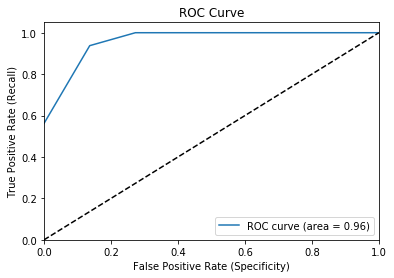

In [30]:
#2.7 ROC Curve
fpr, tpr , threshold = roc_curve(y_test,clf.predict_proba(X_test)[:,1])
roc_auc=auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
#Specificity: How many negatives were identified as negative.
plt.xlabel('False Positive Rate (Specificity)')
#Recall: How many positives were identified as positive.
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [38]:
#code to save your model to disk and then to s3
import pickle
local_path = "/home/ubuntu" # temp path to export your model
bucket_name = "assign2houli" # s3 key to save your network to



# save the model to disk
filename = 'finalized_model_new.sav'
pickle.dump(clf, open(filename, 'wb'))
#you should now see your finalized_model.sav in the file path
#the ls command prints the contents of this notebook's root folder
!ls
 
# Upload to S3
#TO GET THIS WORKING, YOU MUST ASSIGN AN ADMIN ROLE TO YOUR EC2 INSTANCE
import boto3
s3 = boto3.resource('s3')
s3.Bucket(bucket_name).put_object(Key='finalized_model.sav', Body=open('finalized_model.sav'))


cft					   lib
COPYING					   LICENSE
figure					   NOTICE
finalized_model_new.sav			   README.md
images					   Rekognition_Neo4j.ipynb
intro_to_python_data_science_on_aws.ipynb  scripts


IOError: [Errno 2] No such file or directory: 'finalized_model.sav'

In [120]:
# some time later...
 
# load the model from s3 and make new predictions
s3.Bucket(bucket_name).download_file(filename, 'my_local_pickle.sav')
loaded_model = pickle.load(open('my_local_pickle.sav', 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.973684210526


In [1]:
#note that you can now call this model saved in S3 from ANY internet connected location

#now push your notebook to your github page and submit the link as your homework
#instructions: https://www.howtoforge.com/tutorial/install-git-and-github-on-ubuntu-14.04/
#identify your username
!git config --global user.name "kljohnson721"
#make a local git repository
!git init myrepo
#navigate to the repo
cd myrepo/
#create a README
!echo "this is my README file" >>README
#move your notebook into the git folder (you will need to re-enter your notebook interface after moving the file)
!mv /home/ubuntu/intro_to_python_data_science_on_aws.ipynb /home/ubuntu/myrepo/
#make a new repo for yourself within your github.com account
#add the files that you just made to tracking
!git add intro_to_python_data_science_on_aws.ipynb
!git add README
#then remote add the github repo that you just made
!git remote add origin https://github.com/kljohnson721/ADS_Class.git
#then push your files to the git account
!git push origin master
#you will be prompted to enter your security credentials


#if this isn't working for you, another option is to download the file to your local machine using the following:
#sudo scp -r -i 'yourkeypair.pem' ubuntu@publicDNS:/home/ubuntu/intro_to_python_data_science_on_aws.ipynb localpath
#windows people should use something like FileZilla to transfer files from a linux EC2 server to a local windows machine
